In [1]:
# just for training

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [3]:
def check_nan(array):
    nan_in_array = np.array([np.isnan(t) for t in array])
    count_of_nan = np.count_nonzero(nan_in_array == 1)# to check the number of null entries
    return count_of_nan

In [4]:
# a better way to get the number of nulls for all data types:
# a better check nan function that works with any dtype:
def check_nan2(array):
    unique, counts = np.unique(array,return_counts=True)
    dict_ = dict(zip(unique, counts))
    try :
        return dict_["nan"]
    except: 
        return 0

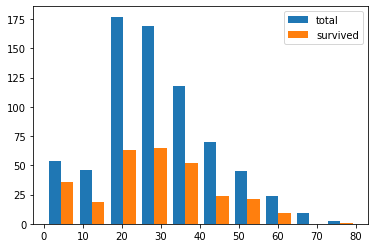

In [11]:
survived_age = np.array([age[i] for i in range(len(age)) if target[i]])
plt.hist([age,survived_age],bins=10, label=["total","survived"])
plt.legend(loc="upper right")

In [66]:
x = {}
index = 0
for cols in train.columns:
    #print(cols)
    if (not(index)) and (str(cols)!="PassengerId" and str(cols)!="Name"):
        x[str(cols)] = np.array([i for i in train.loc[:,cols]])
        index +=1
    else:
        if index and (str(cols)!="PassengerId" and str(cols)!="Name"):
            x[str(cols)] =np.array([i for i in train.loc[:,cols]])
            index +=1   
#x

In [67]:
unique, counts = np.unique(x["Embarked"],return_counts=True)
len(dict(zip(unique, counts))), unique

(4, array(['C', 'Q', 'S', 'nan'], dtype='<U3'))

In [68]:
# C=1, Q=2, S=3, nan=S=3
def embarked_to_integer(p):
    if p == "C":
        return 1
    else :
        if p == "Q":
            return 2
        else :
            return 3
k = embarked_to_integer
x["Embarked"] = np.array([k(i) for i in x["Embarked"]])
#x["Embarked"]

In [8]:
for cols in train.columns:
    print(cols)
    if str(cols)!="PassengerId" and str(cols)!="Name" and str(cols)!="":        
        print(str(check_nan2(x[str(cols)])))

PassengerId
Survived
0
Pclass
0
Name
Sex
0
Age
0
SibSp
0
Parch
0
Ticket
0
Fare
0
Cabin
687
Embarked
0


In [28]:
#ok so cabin is usesless since it has too many nan

In [10]:
f = lambda a: 1 if a.lower() == "male" else 0
#finding nan in "Sex"
x["Sex"] = np.array([f(i) for i in x["Sex"]])#0/1

In [12]:
##REFACTORING AGE:
#finding the mean of age
f = lambda a: a if not np.isnan(a) else 0

age = np.array([f(u)for u in x["Age"]])
median_age = np.median(age)
d = lambda a: a if not np.isnan(a) else median_age
x["Age"] = np.array([d(c) for c in x["Age"]])

In [13]:
x["Age"].max(), x["Age"].min()

(80.0, 0.42)

In [14]:
x["Age"] = x["Age"]/x["Age"].max()

In [15]:
x["Age"].max(), x["Age"].min()

(1.0, 0.0052499999999999995)

In [16]:
x["Fare"].min(), x["Fare"].max()

(0.0, 512.3292)

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0")

In [58]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, H4) 
        self.linear5 = nn.Linear(H4, 1)# binary classifier
    def forward(self,x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = torch.relu(self.linear4(x))
        x = self.linear5(x)
        return x

In [59]:
model = Net(7,10,8,4,2)

In [20]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.2211,  0.1766, -0.1393, -0.0137,  0.1191,  0.3388,  0.2236],
                      [-0.1300,  0.3086, -0.3756, -0.3740,  0.0514, -0.1718,  0.0288],
                      [ 0.1420, -0.2727,  0.3630,  0.1558, -0.1197,  0.2873, -0.1696],
                      [ 0.1020,  0.2039, -0.1517,  0.0660, -0.3775,  0.0068, -0.0635],
                      [-0.0374, -0.2146, -0.3366, -0.3213,  0.0071,  0.2956,  0.1794],
                      [-0.2395,  0.3338, -0.3355,  0.2853,  0.1257,  0.1413, -0.3529],
                      [-0.1543,  0.1450, -0.3014, -0.0130,  0.1080,  0.1684,  0.1368],
                      [ 0.0835,  0.0918,  0.2576,  0.2250, -0.0433,  0.3676,  0.2163],
                      [ 0.1997,  0.2577, -0.0965,  0.2633, -0.0974, -0.1889, -0.1768],
                      [ 0.1477,  0.1223, -0.0083,  0.2505,  0.2685, -0.0113, -0.3504]])),
             ('linear1.bias',
              tensor([-0.1370,  0.1219, -0.2627, -0.3659, -0.2683

In [21]:
optimizer = optim.Adam(model.parameters())

In [22]:
optimizer.state_dict

<bound method Optimizer.state_dict of Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)>

In [60]:
criterion = nn.NLLLoss

In [24]:
a= np.array([[1],[2],[3],[4]])
b = np.array([[5],[6],[7],[8]])
np.concatenate((a, b), axis=1)

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
index = 0
X = []
for col in train.columns:
    logic =str(col)!="PassengerId"and str(col)!="Ticket" and str(col)!="Survived"and str(col)!="Name" and str(col)!="Cabin"
    if (not index) and logic:
        #print(col)
        X.append(x[str(col)])
        X = np.array(X)
        index+=1
    else:
        if logic:
            X = np.concatenate((X, x[str(col)].reshape(1,x[str(col)].shape[0])), axis=0)
            index+=1
            
X = X.T
X = torch.Tensor(X)
X.shape

torch.Size([891, 7])

In [46]:
target = np.copy(x["Survived"])
target = torch.Tensor(target)

In [64]:
model.train()
optimizer.zero_grad()

y = model(X)
y = y.squeeze()
print(y.shape)
target = target.squeeze()
print(target.shape)
loss = criterion(y, target)
loss.backward()
optimizer.step()

model.eval()
with torch.no_grad():
    y = model(X)
    

torch.Size([891])
torch.Size([891])


RuntimeError: bool value of Tensor with more than one value is ambiguous